In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [73]:
df1 = pd.DataFrame(np.random.randint(9,11,size=(1000, 1)), columns=['How likely are you to reccomend the product?']) #promoters
df2 = pd.DataFrame(np.random.randint(7,9,size=(400, 1)), columns=['How likely are you to reccomend the product?']) #passives
df3 = pd.DataFrame(np.random.randint(0,7,size=(100, 1)), columns=['How likely are you to reccomend the product?']) #detractors

df = pd.concat([df1,df2,df3], ignore_index=True)

df['Country Number'] = np.random.randint(1, 6, df.shape[0])
df['Traveler Type Number'] = np.random.randint(1, 3, df.shape[0])


def country_name(x):
    if x['Country Number'] == 1:
        return 'United States'
    elif x['Country Number'] == 2:
        return 'Canada'
    elif x['Country Number'] == 3:
        return 'Mexico'
    elif x['Country Number'] == 4:
        return 'France'
    elif x['Country Number'] == 5:
        return 'Spain'
    else:
        pass

def traveler_type(x):
    if x['Traveler Type Number'] == 1:
        return 'Business'
    elif x['Traveler Type Number'] == 2:
        return 'Leisure'
    else:
        pass

df['Country'] = df.apply(country_name, axis=1)
df['Traveler Type'] = df.apply(traveler_type, axis=1)

df[['How likely are you to reccomend the product?', 'Country', 'Traveler Type']]

,How likely are you to reccomend the product?,Country,Traveler Type
0,10,United States,Business
1,10,United States,Business
2,10,France,Business
3,10,Spain,Leisure
4,9,Canada,Business
...,...,...,...
1495,5,United States,Business
1496,6,Spain,Business
1497,3,Mexico,Business
1498,6,Spain,Business


In [76]:
#df_surveys_test.head()

melted_df = pd.melt(frame = df, id_vars = ['Country','Traveler Type'], value_vars = ['How likely are you to reccomend the product?'],value_name='Score', var_name = 'Question' )

melted_df = melted_df.dropna()

melted_df['Score'] = pd.to_numeric(melted_df['Score'])
melted_df

,Country,Traveler Type,Question,Score
0,United States,Business,How likely are you to reccomend the product?,10
1,United States,Business,How likely are you to reccomend the product?,10
2,France,Business,How likely are you to reccomend the product?,10
3,Spain,Leisure,How likely are you to reccomend the product?,10
4,Canada,Business,How likely are you to reccomend the product?,9
...,...,...,...,...
1495,United States,Business,How likely are you to reccomend the product?,5
1496,Spain,Business,How likely are you to reccomend the product?,6
1497,Mexico,Business,How likely are you to reccomend the product?,3
1498,Spain,Business,How likely are you to reccomend the product?,6


In [77]:
def nps_bucket(x):
    if x > 8:
        bucket = 'promoter'
    elif x > 6:
        bucket = 'passive'
    elif x>= 0:
        bucket = 'detractor'
    else:
        bucket = 'no score'
    return bucket

In [78]:
melted_df['nps_bucket'] = melted_df['Score'].apply(nps_bucket)

melted_df

,Country,Traveler Type,Question,Score,nps_bucket
0,United States,Business,How likely are you to reccomend the product?,10,promoter
1,United States,Business,How likely are you to reccomend the product?,10,promoter
2,France,Business,How likely are you to reccomend the product?,10,promoter
3,Spain,Leisure,How likely are you to reccomend the product?,10,promoter
4,Canada,Business,How likely are you to reccomend the product?,9,promoter
...,...,...,...,...,...
1495,United States,Business,How likely are you to reccomend the product?,5,detractor
1496,Spain,Business,How likely are you to reccomend the product?,6,detractor
1497,Mexico,Business,How likely are you to reccomend the product?,3,detractor
1498,Spain,Business,How likely are you to reccomend the product?,6,detractor


In [79]:
#Calculate the overall Score by question
unpivoted = melted_df.groupby(['Country','Traveler Type','Question'])['nps_bucket'].apply(lambda x: (x.str.contains('promoter').sum() - x.str.contains('detractor').sum()) / (x.str.contains('promoter').sum() + x.str.contains('passive').sum() + x.str.contains('detractor').sum())).reset_index()
unpivoted_sorted = unpivoted.sort_values(by='nps_bucket', ascending=True)

# pivoted = unpivoted.pivot(
#     columns='Country',
#     index='Question',
#     values='nps_bucket')

# #pivoted['Percent Change'] = pivoted['Used Messaging'] / pivoted['Did Not Use Messaging'] - 1

# #pivoted.reset_index(inplace=True)

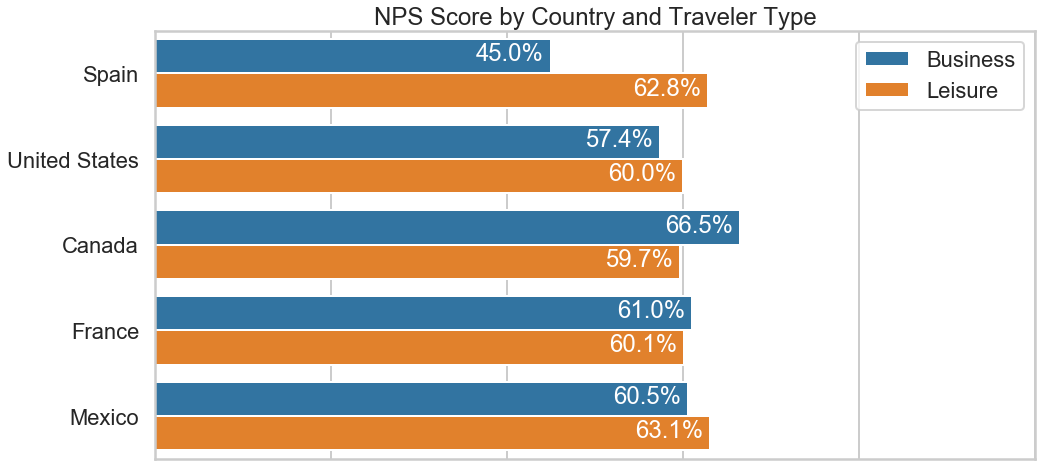

In [83]:
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(15,7))

sns.barplot(data = unpivoted_sorted, 
            x = 'nps_bucket', 
            y='Country', 
            hue='Traveler Type',
               ax=ax)
ax.set(ylabel='',xlabel='', title = 'NPS Score by Country and Traveler Type')
ax.set_xlim(0,1)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.legend()

test_list = []

#data labels
for p in ax.patches:
    ax.annotate("{:.1%}".format(p.get_width()), 
                (p.get_width(), p.get_y()),
                va='center', 
                xytext=(-75, -15), #offset points so that the are inside the chart
                textcoords='offset points', 
                color = 'white')
    test_list.append(p.get_width())
    
plt.tight_layout()
plt.savefig('NPS by Country.png')
plt.show()

In [85]:
odd_i = [] 
even_i = [] 
for i in range(0, len(test_list)): 
    if i % 2: 
        even_i.append(test_list[i]) 
    else : 
        odd_i.append(test_list[i])

In [94]:
percent_change_labels = []

for i, j in list(zip(even_i,odd_i)):
    a = round(i/j-1,3)
    percent_change_labels.append(a)
    

In [95]:
percent_change_labels

[0.276, -0.082, 0.038, -0.005, 0.049]